# Buy Low Sell High Strategy

A simple trading strategy based on daily price changes: buy when price goes up, sell when it goes down.

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Config
TICKER = "GOOG"
START_DATE = "2014-01-01"
END_DATE = "2018-01-01"
INITIAL_CAPITAL = 1000.0

In [3]:
# Fetch data
goog_data = yf.download(TICKER, start=START_DATE, end=END_DATE, progress=False)
if isinstance(goog_data.columns, pd.MultiIndex):
    goog_data.columns = goog_data.columns.get_level_values(0)

goog_data.head()

Price,Close,High,Low,Open,Volume
Date,,,,,
2014-01-02,27.517696,27.632156,27.397551,27.575545,73129082
2014-01-03,27.316957,27.611882,27.315227,27.564171,66917888
2014-01-06,27.621525,27.659594,27.352557,27.514976,71037271
2014-01-07,28.154018,28.174538,27.716455,27.811383,102486711
2014-01-08,28.212608,28.363161,28.016321,28.330529,90036218


In [4]:
# Build signals: 1 when price goes up, 0 when down
goog_data_signal = pd.DataFrame(index=goog_data.index)
goog_data_signal["price"] = goog_data["Close"]
goog_data_signal["daily_difference"] = goog_data_signal["price"].diff()
goog_data_signal["signal"] = np.where(goog_data_signal["daily_difference"] > 0, 1, 0)
goog_data_signal["position"] = goog_data_signal["signal"].diff()

goog_data_signal.head()

,price,daily_difference,signal,position
Date,,,,
2014-01-02,27.517696,NaN,0,NaN
2014-01-03,27.316957,-0.200739,0,0.0
2014-01-06,27.621525,0.304567,1,1.0
2014-01-07,28.154018,0.532494,1,0.0
2014-01-08,28.212608,0.058590,1,0.0


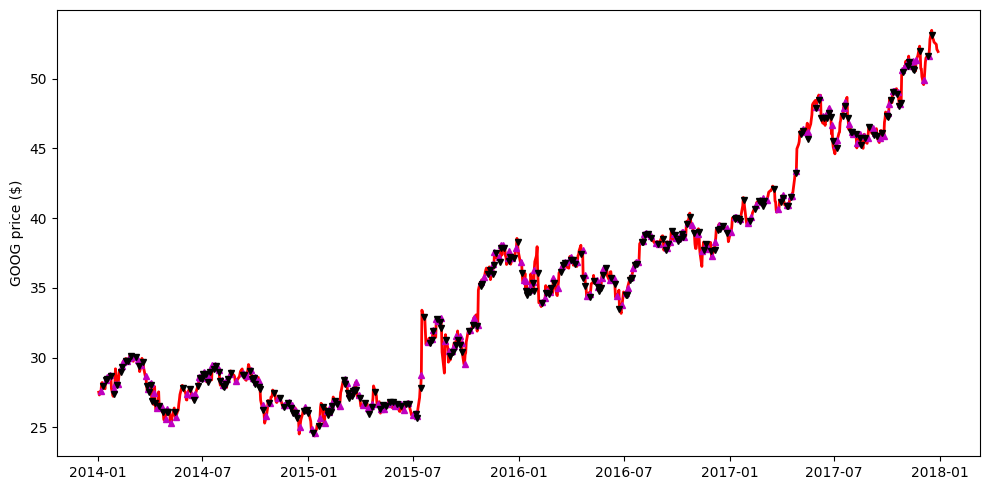

In [5]:
# Plot price with buy/sell markers
fig, ax = plt.subplots(figsize=(10, 5))
ax.set_ylabel(f"{TICKER} price ($)")
ax.plot(goog_data_signal["price"], color="r", linewidth=2)

buys = goog_data_signal[goog_data_signal["position"] == 1.0]
sells = goog_data_signal[goog_data_signal["position"] == -1.0]
ax.plot(buys.index, buys["price"], "^", markersize=5, color="m")
ax.plot(sells.index, sells["price"], "v", markersize=5, color="k")

plt.tight_layout()
plt.show()

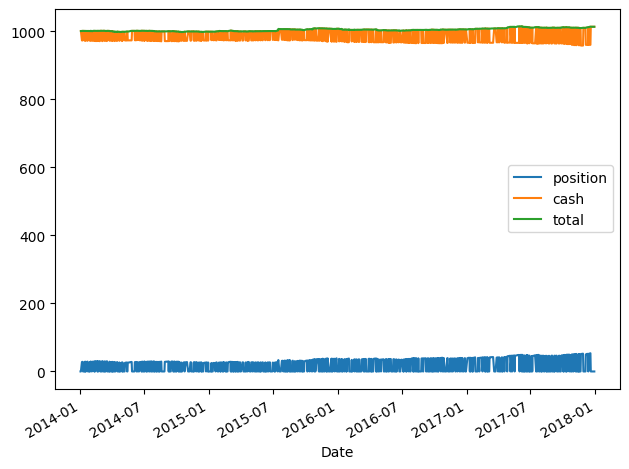

In [6]:
# Portfolio simulation
positions = pd.DataFrame(index=goog_data_signal.index, columns=["GOOG"]).fillna(0.0)
portfolio = pd.DataFrame(index=goog_data_signal.index).fillna(0.0)

positions["GOOG"] = goog_data_signal["signal"]
portfolio["position"] = positions["GOOG"] * goog_data_signal["price"]
portfolio["cash"] = INITIAL_CAPITAL - (
    positions["GOOG"].diff() * goog_data_signal["price"]
).cumsum()
portfolio["total"] = portfolio["position"] + portfolio["cash"]

portfolio.plot()
plt.tight_layout()
plt.show()